# Benchmarking Fashion-MNIST with ANN

## PRE-PROCESSING THE DATA

In [1]:
import tensorflow as tf
from tensorflow import keras
import warnings

import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import load_model

import os
import numpy as np
import matplotlib


from keras.models import Sequential


np.random.seed(42)

warnings.filterwarnings('ignore')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
print("Size of the dataset in MB ", (x_train.nbytes/(1024* 1024)) +  (x_test.nbytes/(1024* 1024)) + (y_train.nbytes/(1024* 1024)) + (y_test.nbytes/(1024* 1024)))
print("Number of Instances ", x_train.shape[0] + x_test.shape[0])
print("Number of Features: ", x_train.shape[1] * x_train.shape[2])

Size of the dataset in MB  52.40440368652344
Number of Instances  70000
Number of Features:  784


x_train shape: (60000, 28, 28) y_train shape: (60000,)


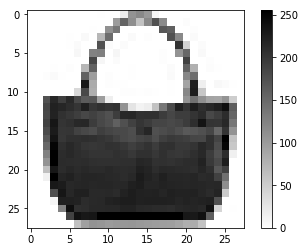

In [3]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Show one of the images from the training dataset
plt.figure()
plt.imshow(x_train[100], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)

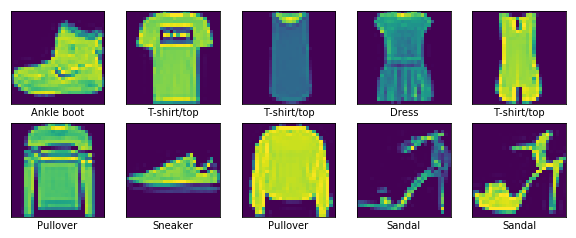

In [4]:
#Fashion-MNIST has 10 classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Plot some images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

## CONSTRUCTION PHASE

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
#Thre Models with 1 hidden layer, 2 hidden layers and 3 hidden layers
class ModelStructure:
    def __init__(self,name):
        self.name = name
    def modelOne(self, activationF1, L1_neurons):
        model1 = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(L1_neurons, activation = activationF1),
            keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
        model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        return model1
    
    def modelTwo(self, activationF1, L1_neurons, activationF2, L2_neurons):
        model2 = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(L1_neurons, activation=activationF1),
            keras.layers.Dense(L2_neurons, activation=activationF2),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ])
        model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        return model2
    
    def modelThree(self, activationF1, L1_neurons, activationF2, L2_neurons, activationF3, L3_neurons):
        model3 = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(L1_neurons, activation=activationF1),
            keras.layers.Dense(L2_neurons, activation=activationF2),
            keras.layers.Dense(L3_neurons, activation=activationF3),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ])
        model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        return model3

In [7]:
#Initial Test Model
#sess = tf.Session()
model= keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ])
model.compile(optimizer=tf.train.AdamOptimizer(), 
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15, batch_size=64) #validation_split=0.33

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
#sess.close()

Epoch 1/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.5225 - acc: 0.8194
Epoch 2/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.3899 - acc: 0.8608
Epoch 3/15
60000/60000 [==============================] - 2s 39us/step - loss: 0.3504 - acc: 0.8734
Epoch 4/15
60000/60000 [==============================] - 3s 43us/step - loss: 0.3238 - acc: 0.8811
Epoch 5/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.3036 - acc: 0.8883
Epoch 6/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2895 - acc: 0.8935
Epoch 7/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2778 - acc: 0.8982
Epoch 8/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.2674 - acc: 0.9009
Epoch 9/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.2551 - acc: 0.9058
Epoch 10/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.2473 - acc: 0.9089

In [8]:
model.save('bestmodel891.h5')  # creates a HDF5 file 'my_model.h5'

In [9]:
best_model = keras.models.load_model('bestmodel891.h5')
best_model.summary()

best_model.compile(optimizer=tf.train.AdamOptimizer(), 
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8875


## EXECUTION PHASE

ModelOne with  Relu  activation Function with  128  neurons
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 3s 86us/step - loss: 0.5309 - acc: 0.8153 - val_loss: 0.4209 - val_acc: 0.8505
Epoch 2/15
40199/40199 [==============================] - 3s 84us/step - loss: 0.3951 - acc: 0.8580 - val_loss: 0.3895 - val_acc: 0.8619
Epoch 3/15
40199/40199 [==============================] - 3s 82us/step - loss: 0.3545 - acc: 0.8722 - val_loss: 0.3637 - val_acc: 0.8704
Epoch 4/15
40199/40199 [==============================] - 4s 87us/step - loss: 0.3240 - acc: 0.8814 - val_loss: 0.3505 - val_acc: 0.8742
Epoch 5/15
40199/40199 [==============================] - 3s 82us/step - loss: 0.3082 - acc: 0.8861 - val_loss: 0.3418 - val_acc: 0.8741
Epoch 6/15
40199/40199 [==============================] - 3s 83us/step - loss: 0.2902 - acc: 0.8934 - val_loss: 0.3502 - val_acc: 0.8747
Epoch 7/15
40199/40199 [==============================] - 3s 85us/st

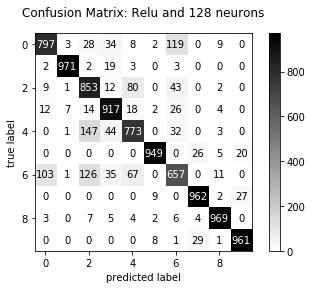

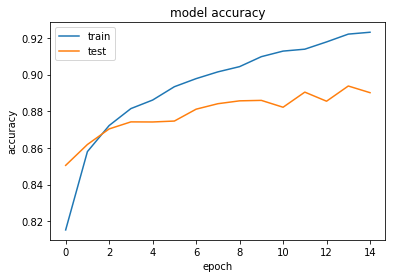

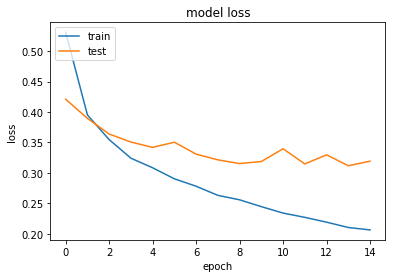

ModelOne with  Relu6  activation Function with  128  neurons
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 4s 93us/step - loss: 0.5366 - acc: 0.8114 - val_loss: 0.4545 - val_acc: 0.8445
Epoch 2/15
40199/40199 [==============================] - 4s 88us/step - loss: 0.3980 - acc: 0.8575 - val_loss: 0.3875 - val_acc: 0.8595
Epoch 3/15
40199/40199 [==============================] - 4s 88us/step - loss: 0.3565 - acc: 0.8706 - val_loss: 0.3492 - val_acc: 0.8740
Epoch 4/15
40199/40199 [==============================] - 4s 88us/step - loss: 0.3275 - acc: 0.8803 - val_loss: 0.3645 - val_acc: 0.8649
Epoch 5/15
40199/40199 [==============================] - 4s 89us/step - loss: 0.3088 - acc: 0.8855 - val_loss: 0.3492 - val_acc: 0.8766
Epoch 6/15
40199/40199 [==============================] - 4s 110us/step - loss: 0.2928 - acc: 0.8914 - val_loss: 0.3378 - val_acc: 0.8789
Epoch 7/15
40199/40199 [==============================] - 4s 107us

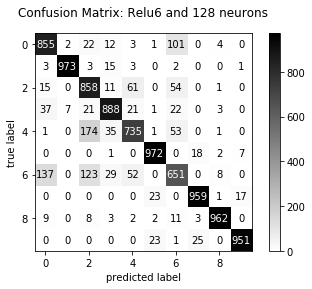

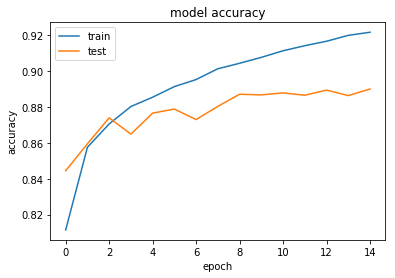

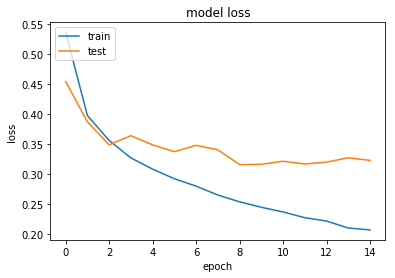

ModelOne with  Crelu  activation Function with  128  neurons
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 5s 119us/step - loss: 0.5344 - acc: 0.8137 - val_loss: 0.4662 - val_acc: 0.8401
Epoch 2/15
40199/40199 [==============================] - 4s 94us/step - loss: 0.3978 - acc: 0.8597 - val_loss: 0.3836 - val_acc: 0.8630
Epoch 3/15
40199/40199 [==============================] - 4s 100us/step - loss: 0.3650 - acc: 0.8689 - val_loss: 0.3870 - val_acc: 0.8594
Epoch 4/15
40199/40199 [==============================] - 4s 97us/step - loss: 0.3334 - acc: 0.8781 - val_loss: 0.3593 - val_acc: 0.8715
Epoch 5/15
40199/40199 [==============================] - 5s 117us/step - loss: 0.3165 - acc: 0.8839 - val_loss: 0.3607 - val_acc: 0.8706
Epoch 6/15
40199/40199 [==============================] - 4s 106us/step - loss: 0.2991 - acc: 0.8893 - val_loss: 0.3309 - val_acc: 0.8825
Epoch 7/15
40199/40199 [==============================] - 5s 11

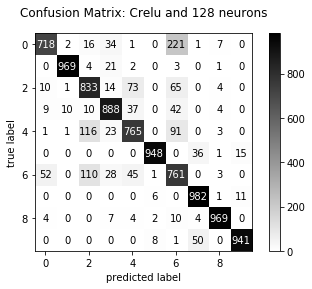

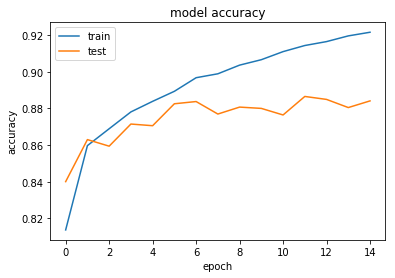

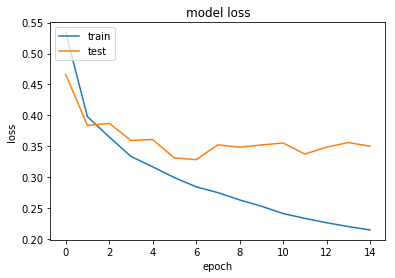

ModelOne with  Elu  activation Function with  128  neurons
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 4s 95us/step - loss: 0.5282 - acc: 0.8128 - val_loss: 0.4246 - val_acc: 0.8476
Epoch 2/15
40199/40199 [==============================] - 4s 87us/step - loss: 0.4012 - acc: 0.8550 - val_loss: 0.4140 - val_acc: 0.8449
Epoch 3/15
40199/40199 [==============================] - 4s 88us/step - loss: 0.3597 - acc: 0.8690 - val_loss: 0.3654 - val_acc: 0.8681
Epoch 4/15
40199/40199 [==============================] - 4s 102us/step - loss: 0.3338 - acc: 0.8774 - val_loss: 0.3967 - val_acc: 0.8539
Epoch 5/15
40199/40199 [==============================] - 4s 107us/step - loss: 0.3127 - acc: 0.8840 - val_loss: 0.3336 - val_acc: 0.8776
Epoch 6/15
40199/40199 [==============================] - 4s 95us/step - loss: 0.2938 - acc: 0.8896 - val_loss: 0.3252 - val_acc: 0.8819
Epoch 7/15
40199/40199 [==============================] - 4s 91us/s

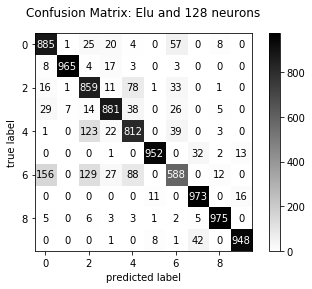

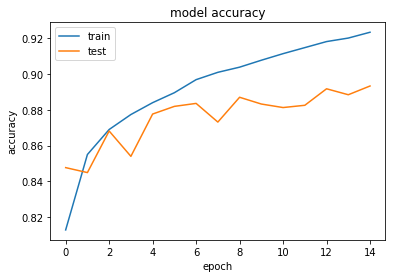

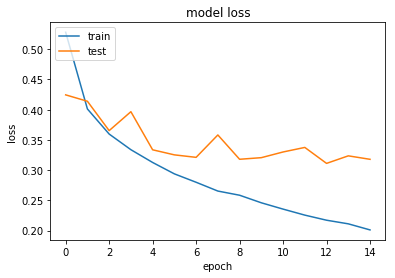

In [10]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


activation_functions = [tf.nn.relu, tf.nn.relu6, tf.nn.crelu, tf.nn.elu]
activation_functions_names = ["Relu", "Relu6", "Crelu", "Elu"]
i = 0
models_1 = []
for acf in activation_functions:
    ms = ModelStructure("First Model")
    model1 = ms.modelOne(activation_functions[i], 128)
    print("ModelOne with ",activation_functions_names[i]," activation Function with ", 128," neurons")
    history = model1.fit(x_train, y_train, epochs=15, validation_split=0.33)
    test_loss, test_acc = model1.evaluate(x_test, y_test)
    print('Test accuracy:', test_acc)
    models_1.append(model1)
    
    model1.save('model1'+activation_functions_names[i]+'.h5')  # creates a HDF5 file 'my_model.h5'
    
    #confusion matrix
    y_pred = models_1[i].predict(x_test)
    y_classes_pred = y_pred.argmax(axis=-1)
    
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_classes_pred, 
                      binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar =True, cmap = plt.cm.binary, show_absolute=True) #show_normed = True
    plt.title("Confusion Matrix: "+ str(activation_functions_names[i])+ " and "+ str(128)+ " neurons")
    plt.show()
    
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    i = i+1



ModelTwo with  Relu  activation Function with 256 and 128 Neurons 2 Hidden Layers
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 6s 150us/step - loss: 0.5119 - acc: 0.8176 - val_loss: 0.4077 - val_acc: 0.8511
Epoch 2/15
40199/40199 [==============================] - 5s 133us/step - loss: 0.3827 - acc: 0.8605 - val_loss: 0.3616 - val_acc: 0.8682
Epoch 3/15
40199/40199 [==============================] - 6s 147us/step - loss: 0.3450 - acc: 0.8728 - val_loss: 0.3516 - val_acc: 0.8712
Epoch 4/15
40199/40199 [==============================] - 5s 136us/step - loss: 0.3176 - acc: 0.8827 - val_loss: 0.3650 - val_acc: 0.8670
Epoch 5/15
40199/40199 [==============================] - 5s 131us/step - loss: 0.2973 - acc: 0.8885 - val_loss: 0.3348 - val_acc: 0.8804
Epoch 6/15
40199/40199 [==============================] - 5s 130us/step - loss: 0.2803 - acc: 0.8936 - val_loss: 0.3452 - val_acc: 0.8747
Epoch 7/15
40199/40199 [================

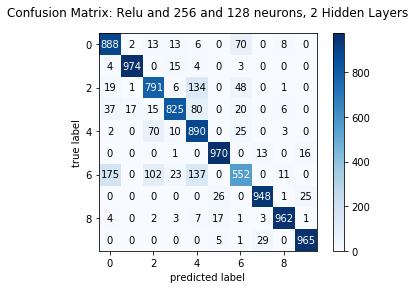

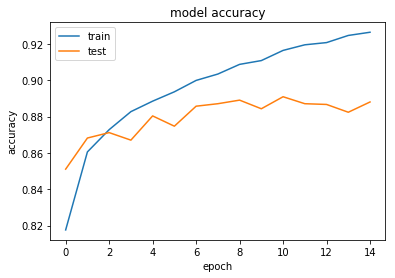

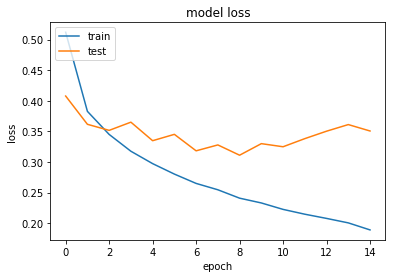

ModelTwo with  Relu6  activation Function with 256 and 128 Neurons 2 Hidden Layers
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 6s 146us/step - loss: 0.5098 - acc: 0.8187 - val_loss: 0.4009 - val_acc: 0.8529
Epoch 2/15
40199/40199 [==============================] - 5s 136us/step - loss: 0.3812 - acc: 0.8599 - val_loss: 0.3851 - val_acc: 0.8604
Epoch 3/15
40199/40199 [==============================] - 6s 139us/step - loss: 0.3391 - acc: 0.8759 - val_loss: 0.3742 - val_acc: 0.8589
Epoch 4/15
40199/40199 [==============================] - 6s 142us/step - loss: 0.3101 - acc: 0.8852 - val_loss: 0.3792 - val_acc: 0.8655
Epoch 5/15
40199/40199 [==============================] - 6s 137us/step - loss: 0.2935 - acc: 0.8886 - val_loss: 0.3552 - val_acc: 0.8698
Epoch 6/15
40199/40199 [==============================] - 6s 159us/step - loss: 0.2782 - acc: 0.8955 - val_loss: 0.3203 - val_acc: 0.8833
Epoch 7/15
40199/40199 [===============

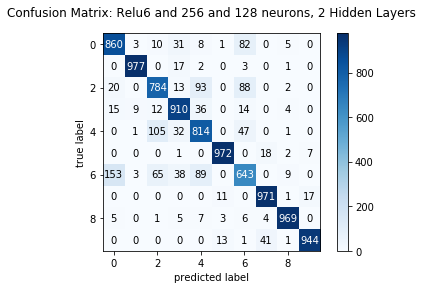

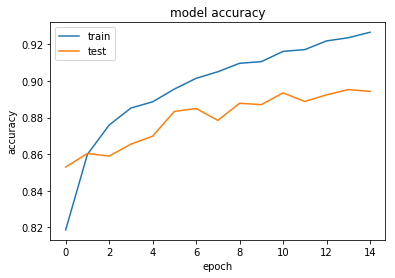

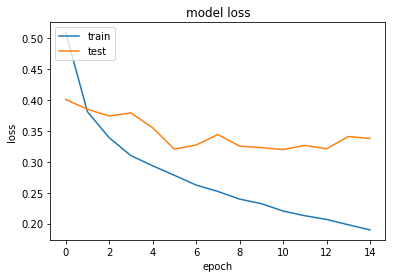

ModelTwo with  Crelu  activation Function with 256 and 128 Neurons 2 Hidden Layers
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 7s 178us/step - loss: 0.5316 - acc: 0.8141 - val_loss: 0.4607 - val_acc: 0.8335
Epoch 2/15
40199/40199 [==============================] - 7s 165us/step - loss: 0.4029 - acc: 0.8544 - val_loss: 0.4040 - val_acc: 0.8541
Epoch 3/15
40199/40199 [==============================] - 7s 171us/step - loss: 0.3684 - acc: 0.8661 - val_loss: 0.3940 - val_acc: 0.8652
Epoch 4/15
40199/40199 [==============================] - 7s 167us/step - loss: 0.3435 - acc: 0.8736 - val_loss: 0.3816 - val_acc: 0.8685
Epoch 5/15
40199/40199 [==============================] - 7s 182us/step - loss: 0.3249 - acc: 0.8794 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 6/15
40199/40199 [==============================] - 7s 177us/step - loss: 0.3111 - acc: 0.8851 - val_loss: 0.3512 - val_acc: 0.8822
Epoch 7/15
40199/40199 [===============

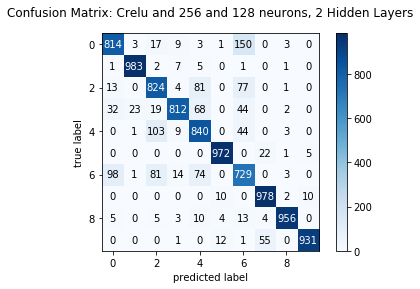

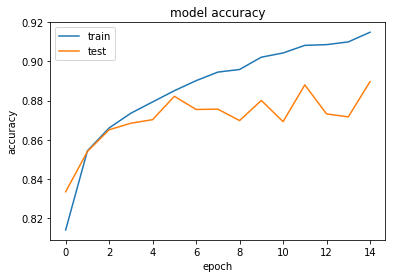

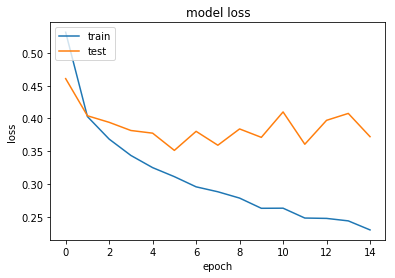

ModelTwo with  Elu  activation Function with 256 and 128 Neurons 2 Hidden Layers
Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 6s 159us/step - loss: 0.5113 - acc: 0.8141 - val_loss: 0.4027 - val_acc: 0.8571
Epoch 2/15
40199/40199 [==============================] - 6s 157us/step - loss: 0.3877 - acc: 0.8573 - val_loss: 0.3526 - val_acc: 0.8712
Epoch 3/15
40199/40199 [==============================] - 7s 164us/step - loss: 0.3478 - acc: 0.8704 - val_loss: 0.3476 - val_acc: 0.8741
Epoch 4/15
40199/40199 [==============================] - 7s 163us/step - loss: 0.3199 - acc: 0.8792 - val_loss: 0.3653 - val_acc: 0.8682
Epoch 5/15
40199/40199 [==============================] - 6s 153us/step - loss: 0.3045 - acc: 0.8859 - val_loss: 0.3445 - val_acc: 0.8761
Epoch 6/15
40199/40199 [==============================] - 6s 153us/step - loss: 0.2877 - acc: 0.8915 - val_loss: 0.3327 - val_acc: 0.8814
Epoch 7/15
40199/40199 [=================

In [ ]:
#models_2 test
activation_functions = [tf.nn.relu, tf.nn.relu6, tf.nn.crelu, tf.nn.elu]
activation_functions_names = ["Relu", "Relu6", "Crelu", "Elu"]
#neurons = [256, 128, 64]
i = 0
models_2 = []
for acf in activation_functions:
    ms = ModelStructure("First Model")
    model2 = ms.modelTwo(activation_functions[i], 256, activation_functions[i], 128)
    print("ModelTwo with ",activation_functions_names[i]," activation Function with 256 and 128 Neurons 2 Hidden Layers")
    history = model2.fit(x_train, y_train, epochs=15, validation_split=0.33)
    test_loss, test_acc = model2.evaluate(x_test, y_test)
    print('Test accuracy:', test_acc)
    models_2.append(model2)
    
    model2.save('model2'+activation_functions_names[i]+'.h5')  # creates a HDF5 file 'my_model.h5'
    
    #confusion matrix
    y_pred = models_2[i].predict(x_test)
    y_classes_pred = y_pred.argmax(axis=-1)
    
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_classes_pred, 
                      binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar =True, cmap = plt.cm.Blues, show_absolute=True) #show_normed = True
    plt.title("Confusion Matrix: "+ str(activation_functions_names[i])+ " and 256 and 128 neurons, 2 Hidden Layers")
    plt.show()
    
    
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    i = i+1


In [ ]:
#best model for model structure Two
best_model2 = keras.models.load_model('model2Relu.h5')
best_model2.summary()
best_model2.compile(optimizer=tf.train.AdamOptimizer(), 
      loss='sparse_categorical_crossentropy', 
      metrics=['accuracy'])


test_loss, test_acc = best_model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
#confusion matrix
y_pred = best_model2.predict(x_test)
y_classes_pred = y_pred.argmax(axis=-1)

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=y_classes_pred, 
                  binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar =True, cmap = plt.cm.Blues, show_absolute=True) #show_normed = True
plt.title("Confusion Matrix for RELU function and 256 and 128 neurons with 15 epochs, 2 Hidden Layers")
plt.show()


In [ ]:
#models_3 test
activation_functions = [tf.nn.relu, tf.nn.relu6, tf.nn.crelu, tf.nn.elu]
activation_functions_names = ["Relu", "Relu6", "Crelu", "Elu"]
#neurons = [256, 128, 64]
i = 0
models_3 = []
for acf in activation_functions:
    ms = ModelStructure("First Model")
    model3 = ms.modelThree(activation_functions[i], 256, activation_functions[i], 128, activation_functions[i], 64)
    print("ModelTwo with ",activation_functions_names[i]," activation Function with 256 and 128, and 64 Neurons 2 Hidden Layers")
    history = model3.fit(x_train, y_train, epochs=15, validation_split=0.33)
    test_loss, test_acc = model3.evaluate(x_test, y_test)
    print('Test accuracy:', test_acc)
    models_3.append(model3)
    model3.save('model3'+activation_functions_names[i]+'.h5')  # creates a HDF5 file 'my_model.h5'
    
    #confusion matrix
    y_pred = models_3[i].predict(x_test)
    y_classes_pred = y_pred.argmax(axis=-1)
    
    cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_classes_pred, 
                      binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar =True, cmap = plt.cm.Blues, show_absolute=True) #show_normed = True
    plt.title("Confusion Matrix: "+ str(activation_functions_names[i])+ " and 256 and 128, 64 neurons, 2 Hidden Layers")
    plt.show()
    
    
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    i = i+1

In [ ]:
#The best model yield for modelOne, with only one hidden layer.  Used Activation function is: RELU,
#The number of neurons used are: 128. And the loss function is: sparse_categorical_crossentropy
#The model summary is demonestracted as follows: 
#The Total Accuracy is: 0.891
best_model = keras.models.load_model('bestmodel891.h5')
best_model.summary()

best_model.compile(optimizer=tf.train.AdamOptimizer(), 
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
#confusion matrix
y_pred = best_model.predict(x_test)
y_classes_pred = y_pred.argmax(axis=-1)

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=y_classes_pred, 
                  binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar =True, cmap = plt.cm.binary, show_absolute=True) #show_normed = True
plt.title("Confusion Matrix for RELU function and 128 neurons with 15 epochs")
plt.show()